## IBM Modeling

- Triple Barrier Methods
- Bollinger Bands
- RSI

### Features

- Technical Features
- FOREX
- Bond yields

#### Exogenous Features

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import yfinance as yf
from FinancialMachineLearning.labeling.labeling import *
from FinancialMachineLearning.features.volatility import daily_volatility
import matplotlib as mpl

mpl.rc('axes.spines', top=False, bottom=False, left=False, right=False)
mpl.rc('grid', linestyle=':', color='gray', alpha=0.5)

start_date = '2000-01-01'
end_date = '2024-05-15'
ticker = 'IBM'
data = yf.download(
    ticker, 
    start = start_date, 
    end = end_date
)

[*********************100%%**********************]  1 of 1 completed


In [3]:
features = ['^FVX','^TYX','^VIX','JPY=X','^GSPC','GC=F']
exog = yf.download(
    features,
    start = start_date,
    end = end_date
)['Adj Close']

[*********************100%%**********************]  6 of 6 completed


In [4]:
exog[['^FVX','^TYX','JPY=X','^GSPC','GC=F']] = exog[['^FVX','^TYX','JPY=X','^GSPC','GC=F']].pct_change()
exog['^VIX'] = exog['^VIX'] * 0.01

#### Technical Features

In [5]:
from ta.volume import money_flow_index, ease_of_movement
from ta.volatility import average_true_range, ulcer_index
from ta.trend import adx, trix
from ta.momentum import rsi, stoch
def psycological_index(data, window = 12):
    up_days = data['Close'].diff() > 0
    sentiment = up_days.rolling(window = window).sum() / window
    return sentiment

data['money_flow_index'] = money_flow_index(
    high = data['High'],
    low = data['Low'],
    close = data['Close'],
    volume = data['Volume'],
    window = 14
) * 0.01 # normalizing
data['ease_of_movement'] = ease_of_movement(
    high = data['High'],
    low = data['Low'],
    volume = data['Volume'],
    window = 14
) * 0.01
data['average_true_range'] = average_true_range(
    high = data['High'],
    low = data['Low'],
    close = data['Close'],
    window = 14
).pct_change()
data['ulcer_index'] = ulcer_index(
    close = data['Close'],
    window = 14
) * 0.01
data['adx'] = adx(
    high = data['High'],
    low = data['Low'],
    close = data['Close'],
    window = 14
) * 0.01
data['trix'] = trix(
    close = data['Close'],
    window = 14
) * 0.01
data['rsi'] = rsi(
    close = data['Close'],
    window = 14
) * 0.01
data['stoch'] = stoch(
    high = data['High'],
    low = data['Low'],
    close = data['Close'],
    window = 14
) * 0.01
data['psycological_index'] = psycological_index(
    data, window = 14
)

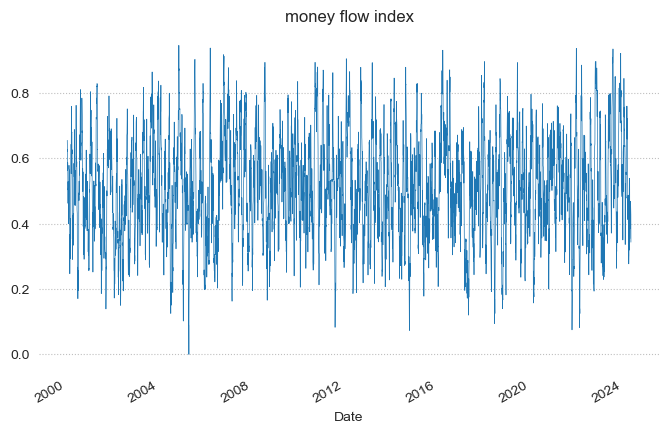

In [6]:
fig, ax = plt.subplots(figsize = (8, 5))
data['money_flow_index'].plot(lw = 0.5, ax = ax)
ax.xaxis.grid(False)
plt.title('money flow index')
plt.show()

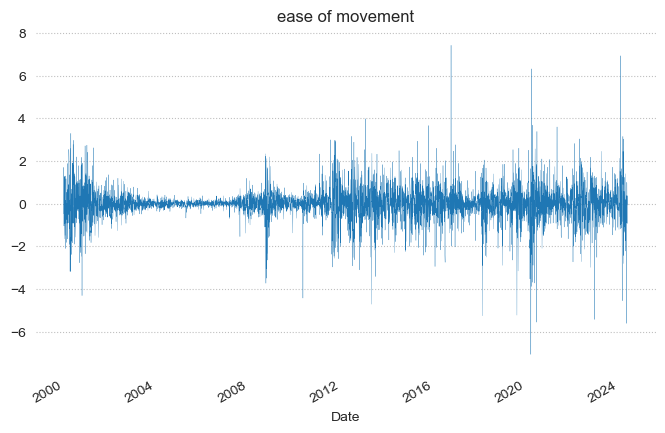

In [7]:
fig, ax = plt.subplots(figsize = (8, 5))
data['ease_of_movement'].plot(lw = 0.2, ax = ax)
ax.xaxis.grid(False)
plt.title('ease of movement')
plt.show()

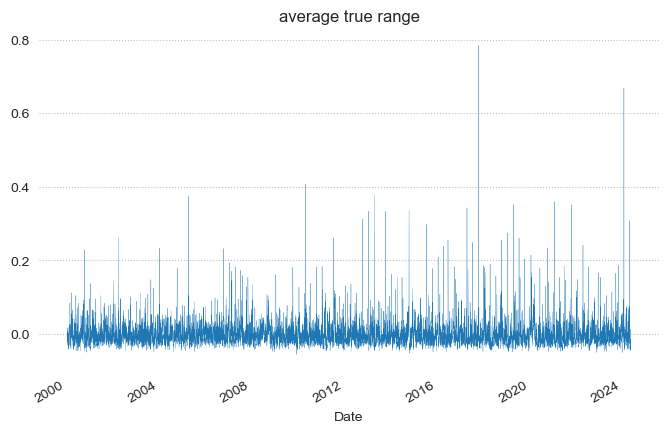

In [8]:
fig, ax = plt.subplots(figsize = (8, 5))
data['average_true_range'].plot(lw = 0.2, ax = ax)
ax.xaxis.grid(False)
plt.title('average true range')
plt.show()

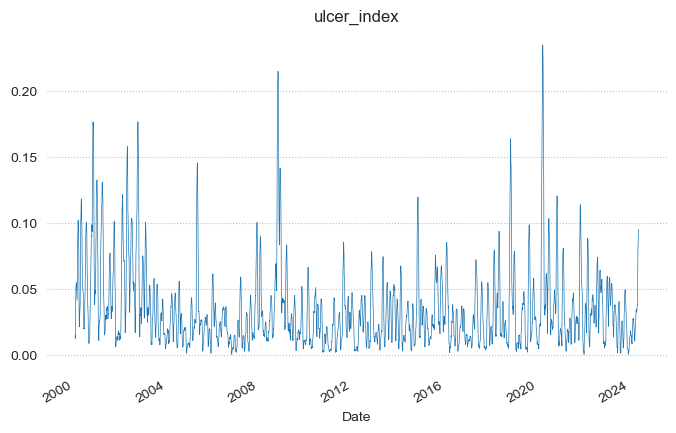

In [9]:
fig, ax = plt.subplots(figsize = (8, 5))
data['ulcer_index'].plot(lw = 0.5, ax = ax)
ax.xaxis.grid(False)
plt.title('ulcer_index')
plt.show()

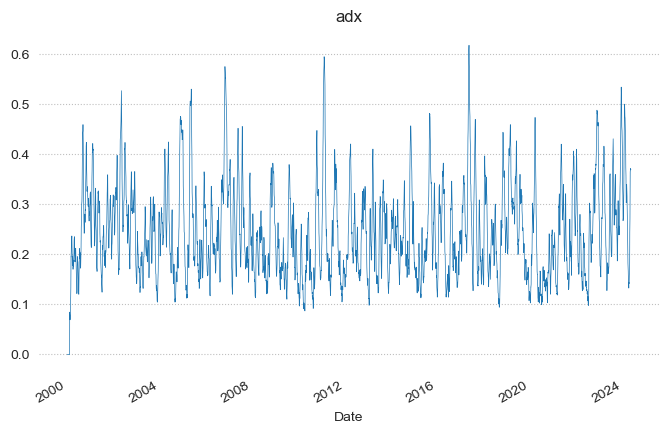

In [10]:
fig, ax = plt.subplots(figsize = (8, 5))
data['adx'].plot(lw = 0.5, ax = ax)
ax.xaxis.grid(False)
plt.title('adx')
plt.show()

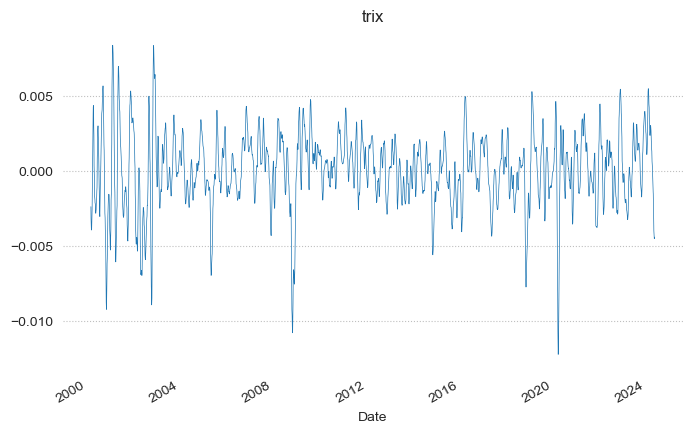

In [11]:
fig, ax = plt.subplots(figsize = (8, 5))
data['trix'].plot(lw = 0.5, ax = ax)
ax.xaxis.grid(False)
plt.title('trix')
plt.show()

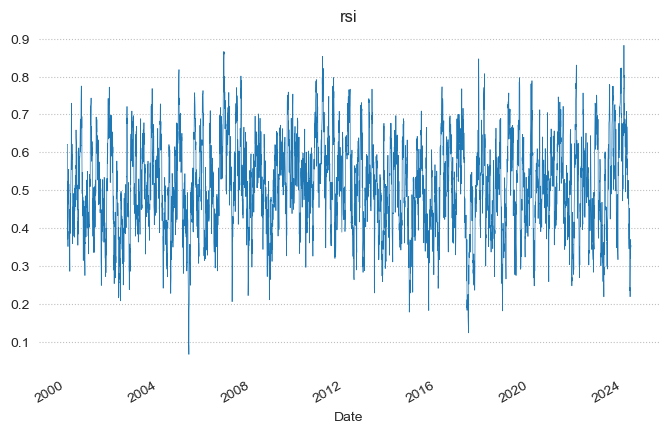

In [12]:
fig, ax = plt.subplots(figsize = (8, 5))
data['rsi'].plot(lw = 0.5, ax = ax)
ax.xaxis.grid(False)
plt.title('rsi')
plt.show()

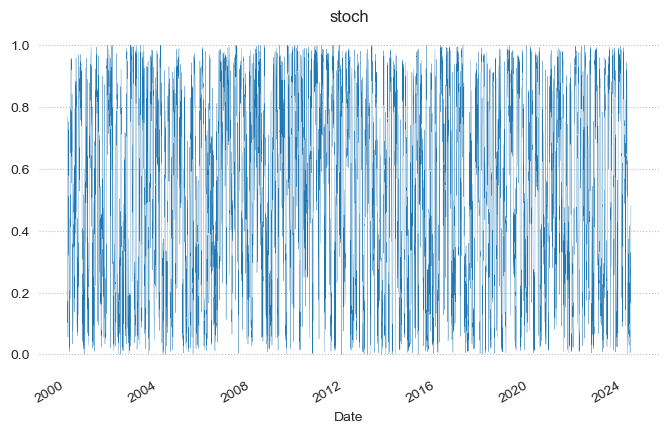

In [13]:
fig, ax = plt.subplots(figsize = (8, 5))
data['stoch'].plot(lw = 0.2, ax = ax)
ax.xaxis.grid(False)
plt.title('stoch')
plt.show()

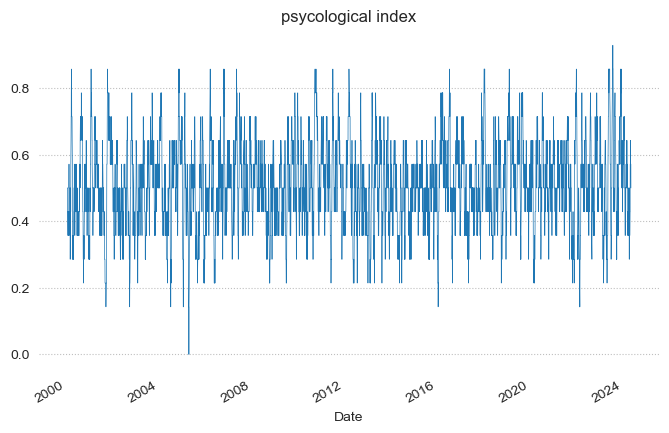

In [14]:
fig, ax = plt.subplots(figsize = (8, 5))
data['psycological_index'].plot(lw = 0.5, ax = ax)
ax.xaxis.grid(False)
plt.title('psycological index')
plt.show()

#### statistical features

In [15]:
data['ret'] = data['Close'].pct_change()
data['std'] = data['Close'].pct_change().rolling(window = 20).std()
data['skew'] = data['Close'].pct_change().rolling(window = 20).skew()
data['kurt'] = data['Close'].pct_change().rolling(window = 20).kurt()

In [16]:
data = pd.concat(
    [data, exog], axis = 1
)

In [17]:
data

,Open,High,Low,Close,Adj Close,Volume,money_flow_index,ease_of_movement,average_true_range,ulcer_index,...,ret,std,skew,kurt,GC=F,JPY=X,^FVX,^GSPC,^TYX,^VIX
Date,,,,,,,,,,,,,,,,,,,,,
2000-01-03,107.492828,110.898659,106.955070,110.898659,59.880367,10823694.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.2421
2000-01-04,108.986618,109.464630,105.999046,107.134323,57.847813,8606279.0,NaN,-0.481214,NaN,NaN,...,-0.033944,NaN,NaN,NaN,NaN,0.014259,-0.009447,-0.038345,-0.010003,0.2701
2000-01-05,107.970840,114.483749,107.194077,110.898659,59.880367,13318927.0,NaN,1.700554,NaN,NaN,...,0.035137,NaN,NaN,NaN,NaN,0.009211,0.014540,0.001922,0.015156,0.2641
2000-01-06,112.810707,113.706978,108.508606,108.986618,58.847965,8338607.0,NaN,0.167622,NaN,NaN,...,-0.017241,NaN,NaN,NaN,NaN,0.010952,-0.006010,0.000956,-0.008898,0.2573
2000-01-07,112.093689,112.750954,105.760040,108.508606,58.589874,12402108.0,NaN,-1.044116,NaN,NaN,...,-0.004386,NaN,NaN,NaN,NaN,0.000950,-0.008217,0.027090,-0.005326,0.2172
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-05-08,168.009995,170.259995,167.899994,169.899994,168.229996,3522000.0,0.468480,0.311582,-0.023066,0.087447,...,0.009027,0.020466,-3.124631,12.054155,-0.000691,0.003313,0.006710,-0.000006,0.005427,0.1300
2024-05-09,167.500000,167.550003,165.880005,166.270004,166.270004,4266600.0,0.463022,-0.925685,0.012897,0.090259,...,-0.021365,0.020793,-2.846519,10.410319,0.007996,0.004336,-0.009109,0.005091,-0.005613,0.1269
2024-05-10,167.130005,168.070007,166.320007,167.149994,167.149994,2255400.0,0.455739,0.372442,-0.034152,0.092701,...,0.005293,0.020642,-3.082938,11.696742,0.015094,-0.000193,0.013005,0.001649,0.008684,0.1255


In [18]:
data.to_parquet(f'../../Data/{ticker}_feature_matrix.parquet')

### Labeling

#### Triple Barrier Methods

In [19]:
vertical_barrier = add_vertical_barrier(
    data.index, 
    data['Close'], 
    num_days = 5 # expariation limit
)
vertical_barrier.head()

Date
2000-01-03   2000-01-10
2000-01-04   2000-01-10
2000-01-05   2000-01-10
2000-01-06   2000-01-11
2000-01-07   2000-01-12
Freq: B, Name: Date, dtype: datetime64[ns]

In [20]:
volatility = daily_volatility(
    data['Close'], 
    lookback = 60 # moving average span
)

In [21]:
triple_barrier_events = get_events(
    close = data['Close'],
    t_events = data.index[2:],
    pt_sl = [2, 1], # profit taking 2, stopping loss 1
    target = volatility, # dynamic threshold
    min_ret = 0.03, # minimum position return
    num_threads = 1, # number of multi-thread 
    vertical_barrier_times = vertical_barrier, # add vertical barrier
    side_prediction = None # betting side prediction (primary model)
)
triple_barrier_events.head()

,t1,trgt,pt,sl
Date,,,,
2000-02-03,2000-02-08,0.031785,2,1
2000-02-04,2000-02-09,0.031034,2,1
2000-02-07,2000-02-14,0.030205,2,1
2000-03-03,2000-03-08,0.031083,2,1
2000-03-06,2000-03-13,0.031782,2,1


In [22]:
labels = meta_labeling(
    triple_barrier_events, 
    data['Close']
)

In [23]:
triple_barrier_events['side'] = labels['bin']
triple_barrier_events.head()

,t1,trgt,pt,sl,side
Date,,,,,
2000-02-03,2000-02-08,0.031785,2,1,0
2000-02-04,2000-02-09,0.031034,2,1,0
2000-02-07,2000-02-14,0.030205,2,1,0
2000-03-03,2000-03-08,0.031083,2,1,0
2000-03-06,2000-03-13,0.031782,2,1,0


In [24]:
meta_labels = meta_labeling(
    triple_barrier_events, # with side labels
    data['Close']
)
meta_labels.head()

,ret,trgt,bin,side
Date,,,,
2000-02-03,0.0,0.031785,0,0
2000-02-04,0.0,0.031034,0,0
2000-02-07,0.0,0.030205,0,0
2000-03-03,0.0,0.031083,0,0
2000-03-06,0.0,0.031782,0,0


In [25]:
data['side'] = triple_barrier_events['side'].copy()
data['label'] = meta_labels['bin'].copy()

### Feature Matrix

In [26]:
data.drop(['Open','High','Low','Close','Adj Close','Volume'], axis = 1, inplace = True)

In [27]:
data.dropna(inplace = True)

In [28]:
matrix = data[data['side'] != 0]

In [29]:
X = matrix.drop(['side','label'], axis = 1)
y = matrix['label']

In [30]:
X_train, X_test = X.loc[:'2019'], X.loc['2020':]
y_train, y_test = y.loc[:'2019'], y.loc['2020':]

### Machine Learning Modeling

In [31]:
from sklearn.ensemble import RandomForestClassifier

forest = RandomForestClassifier(
    criterion = 'entropy',
    class_weight = 'balanced_subsample',
    random_state = 42,
    n_estimators = 1000,
    max_features = 8,
    oob_score = True
)

fit = forest.fit(X = X_train, y = y_train)
oob_score = fit.oob_score_

In [32]:
cont = pd.Series(
    triple_barrier_events.loc[X_train.index, 't1'], 
    index = X_train.index, 
    name = 't1'
) 

In [33]:
from FinancialMachineLearning.feature_importance.importance import *
from FinancialMachineLearning.cross_validation.cross_validation import PurgedKFold, cross_val_score
from sklearn.metrics import accuracy_score

cv_gen = PurgedKFold(
    n_splits = 5, 
    samples_info_sets = cont
)
oos_score = cross_val_score(
    forest, 
    X_train, 
    y_train, 
    cv_gen = cv_gen, 
    scoring = accuracy_score
).mean()

mdi = mean_decrease_impurity(fit, X_train.columns)

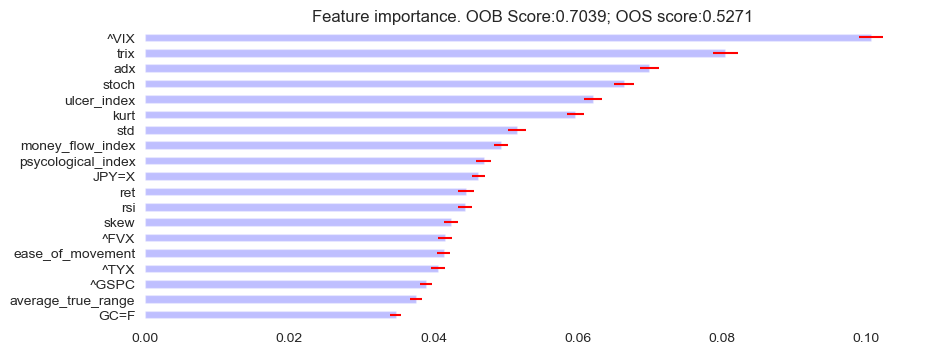

In [34]:
plot_feature_importance(
    mdi,
    oob_score = oob_score,
    oos_score = oos_score,
    save_fig = True,
    output_path = f'./images/{ticker}_MDI_feature_importance.png'
)
plt.grid(False)
plt.show()

In [35]:
from sklearn.metrics import log_loss

mda = mean_decrease_accuracy(
    fit, 
    X_train, 
    y_train, 
    cv_gen, 
    scoring = log_loss
)

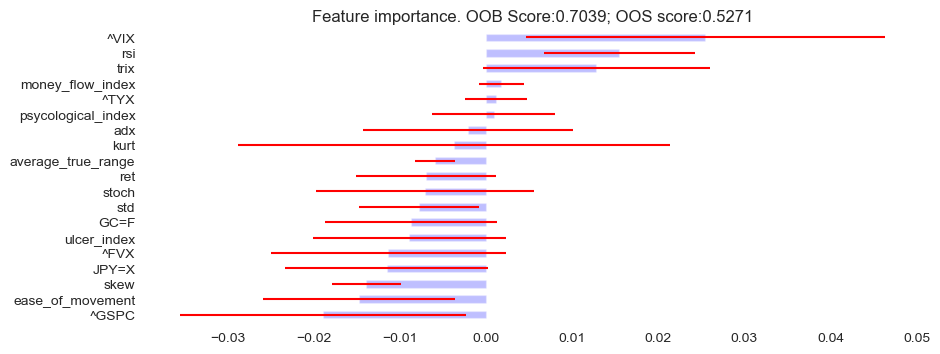

In [36]:
plot_feature_importance(
    mda,
    oob_score = oob_score,
    oos_score = oos_score,
    save_fig = True,
    output_path = f'./images/{ticker}_MDA_feature_importance.png'
)
plt.grid(False)
plt.show()

In [37]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, auc
import warnings
warnings.filterwarnings('ignore')

y_prob = forest.predict_proba(X_test)[:, 1]
y_pred = forest.predict(X_test)
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')

Accuracy: 0.7058823529411765


In [38]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.50      0.60      0.55         5
         1.0       0.82      0.75      0.78        12

    accuracy                           0.71        17
   macro avg       0.66      0.68      0.66        17
weighted avg       0.72      0.71      0.71        17



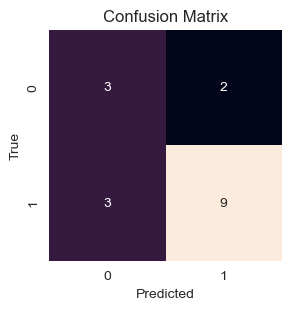

In [39]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize = (3, 3))
sns.heatmap(cm, annot = True, fmt = 'd', cbar = False)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

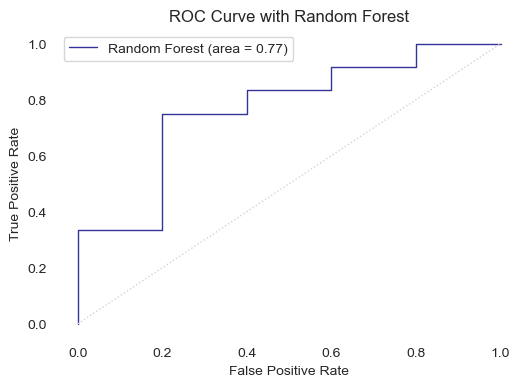

In [40]:
roc_auc = auc(fpr, tpr)

plt.figure(figsize = (6, 4))
plt.plot(fpr, tpr, label = 'Random Forest (area = {:.2f})'.format(roc_auc), color = 'navy', alpha = 0.8, lw = 1)
plt.plot([0, 1], [0, 1], color = 'lightgray', ls = ':', lw = 1)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve with Random Forest')
plt.grid(False)
plt.legend()
plt.show()

In [41]:
import pickle
filename = f'../../Models/{ticker}_triple_barrier_5days.pkl'
with open(filename, 'wb') as file:
    pickle.dump(forest, file)

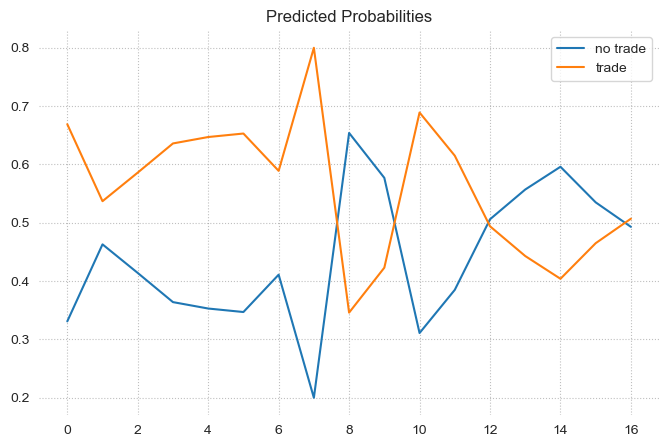

In [42]:
plt.figure(figsize = (8, 5))
plt.plot(forest.predict_proba(X_test))
plt.legend(['no trade','trade'])
plt.title('Predicted Probabilities')
plt.show()